In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook
import mne

In [9]:
path = 'S201R01_t000.edf'
# data = np.fromfile(path, dtype=float)
# data.shape
data = mne.io.read_raw_edf(path)
df = data.to_data_frame()
df.columns

Extracting EDF parameters from /Users/volume999/Documents/PersonalProjects/Hackathon/Google MedTech/Project/GoogleBrainCaptureHackathon/S201R01_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Index(['time', 'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz',
       'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2'],
      dtype='object')

In [10]:
!pip install bokeh

/opt/homebrew/anaconda3/envs/MedTech/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


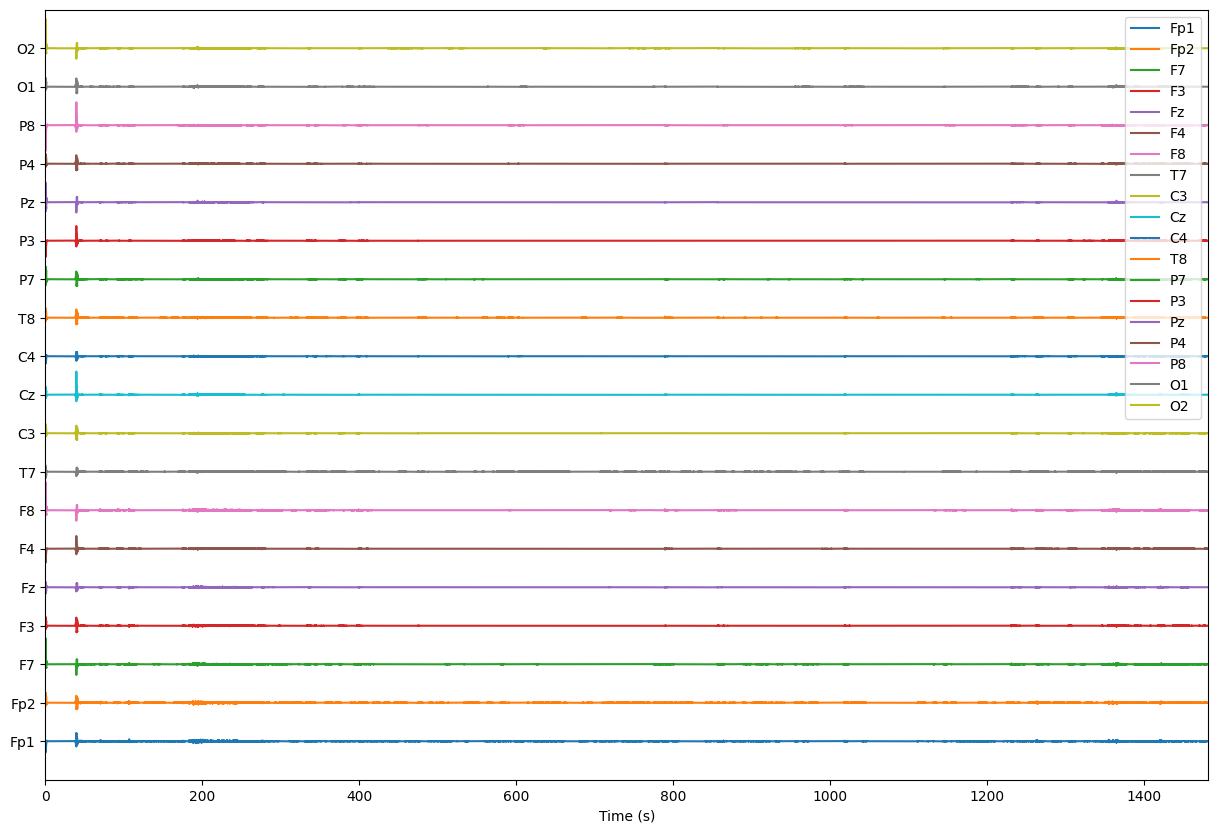

In [20]:
import matplotlib.pyplot as plt

# Assuming 'df' contains 'time' and EEG channels as columns
# And you have a list of channels you want to plot
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']

# Set up the plot
plt.figure(figsize=(15, 10))  # Adjust the size as needed
ax = plt.gca()

# Labels and limits
ax.set_xlabel('Time (s)')
ax.set_xlim(df['time'].min(), df['time'].max())

# Calculate the vertical displacement
n_rows = len(channels)
dy = (df[channels].min().min() - df[channels].max().max()) * 0.7  # Adjust the 0.7 factor as needed

# Set the vertical limits
ax.set_ylim(-dy, n_rows * dy)

# Plot each channel with an offset
for i, channel in enumerate(channels):
    ax.plot(df['time'], df[channel] + i * dy, label=channel)

# Set y-ticks to correspond to each channel, adjusting for the offsets
ax.set_yticks(np.arange(0, n_rows * dy, dy))
ax.set_yticklabels(channels)

# Add slider
# # Choose the Slider color
# slider_color = 'White'
 
# # Set the axis and slider position in the plot
# axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],
#                          facecolor = slider_color)
# slider_position = Slider(axis_position,
#                          'Pos', 0.1, 90.0)
 
# # update() function to change the graph when the
# # slider is in use
# def update(val):
#     pos = slider_position.val
#     Axis.axis([pos, pos+10, -1, 1])
#     Plot.canvas.draw_idle()
 
# # update function called using on_changed() function
# slider_position.on_changed(update)
 
# # Display the plot
# plt.show()

plt.legend()
plt.show()